# RhizoScan Pipeline

This pipeline is a step by step pipeline

## Common import

In [2]:
%pylab inline
from matplotlib import pyplot as plt
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


## RhizoScan Import

In [3]:
from rhizoscan import get_data_path
from rhizoscan.root.pipeline import load_image, detect_petri_plate, compute_graph, compute_tree
from rhizoscan.root.pipeline.arabidopsis import segment_image, detect_leaves
from rhizoscan.root.graph.mtg import tree_to_mtg

NOT using graph editor observer No module named grapheditor
 *** failed to import openalea.core.NodeFactory ***
 *** failed to import openalea.core.node.FuncNode ***


## RSA Image

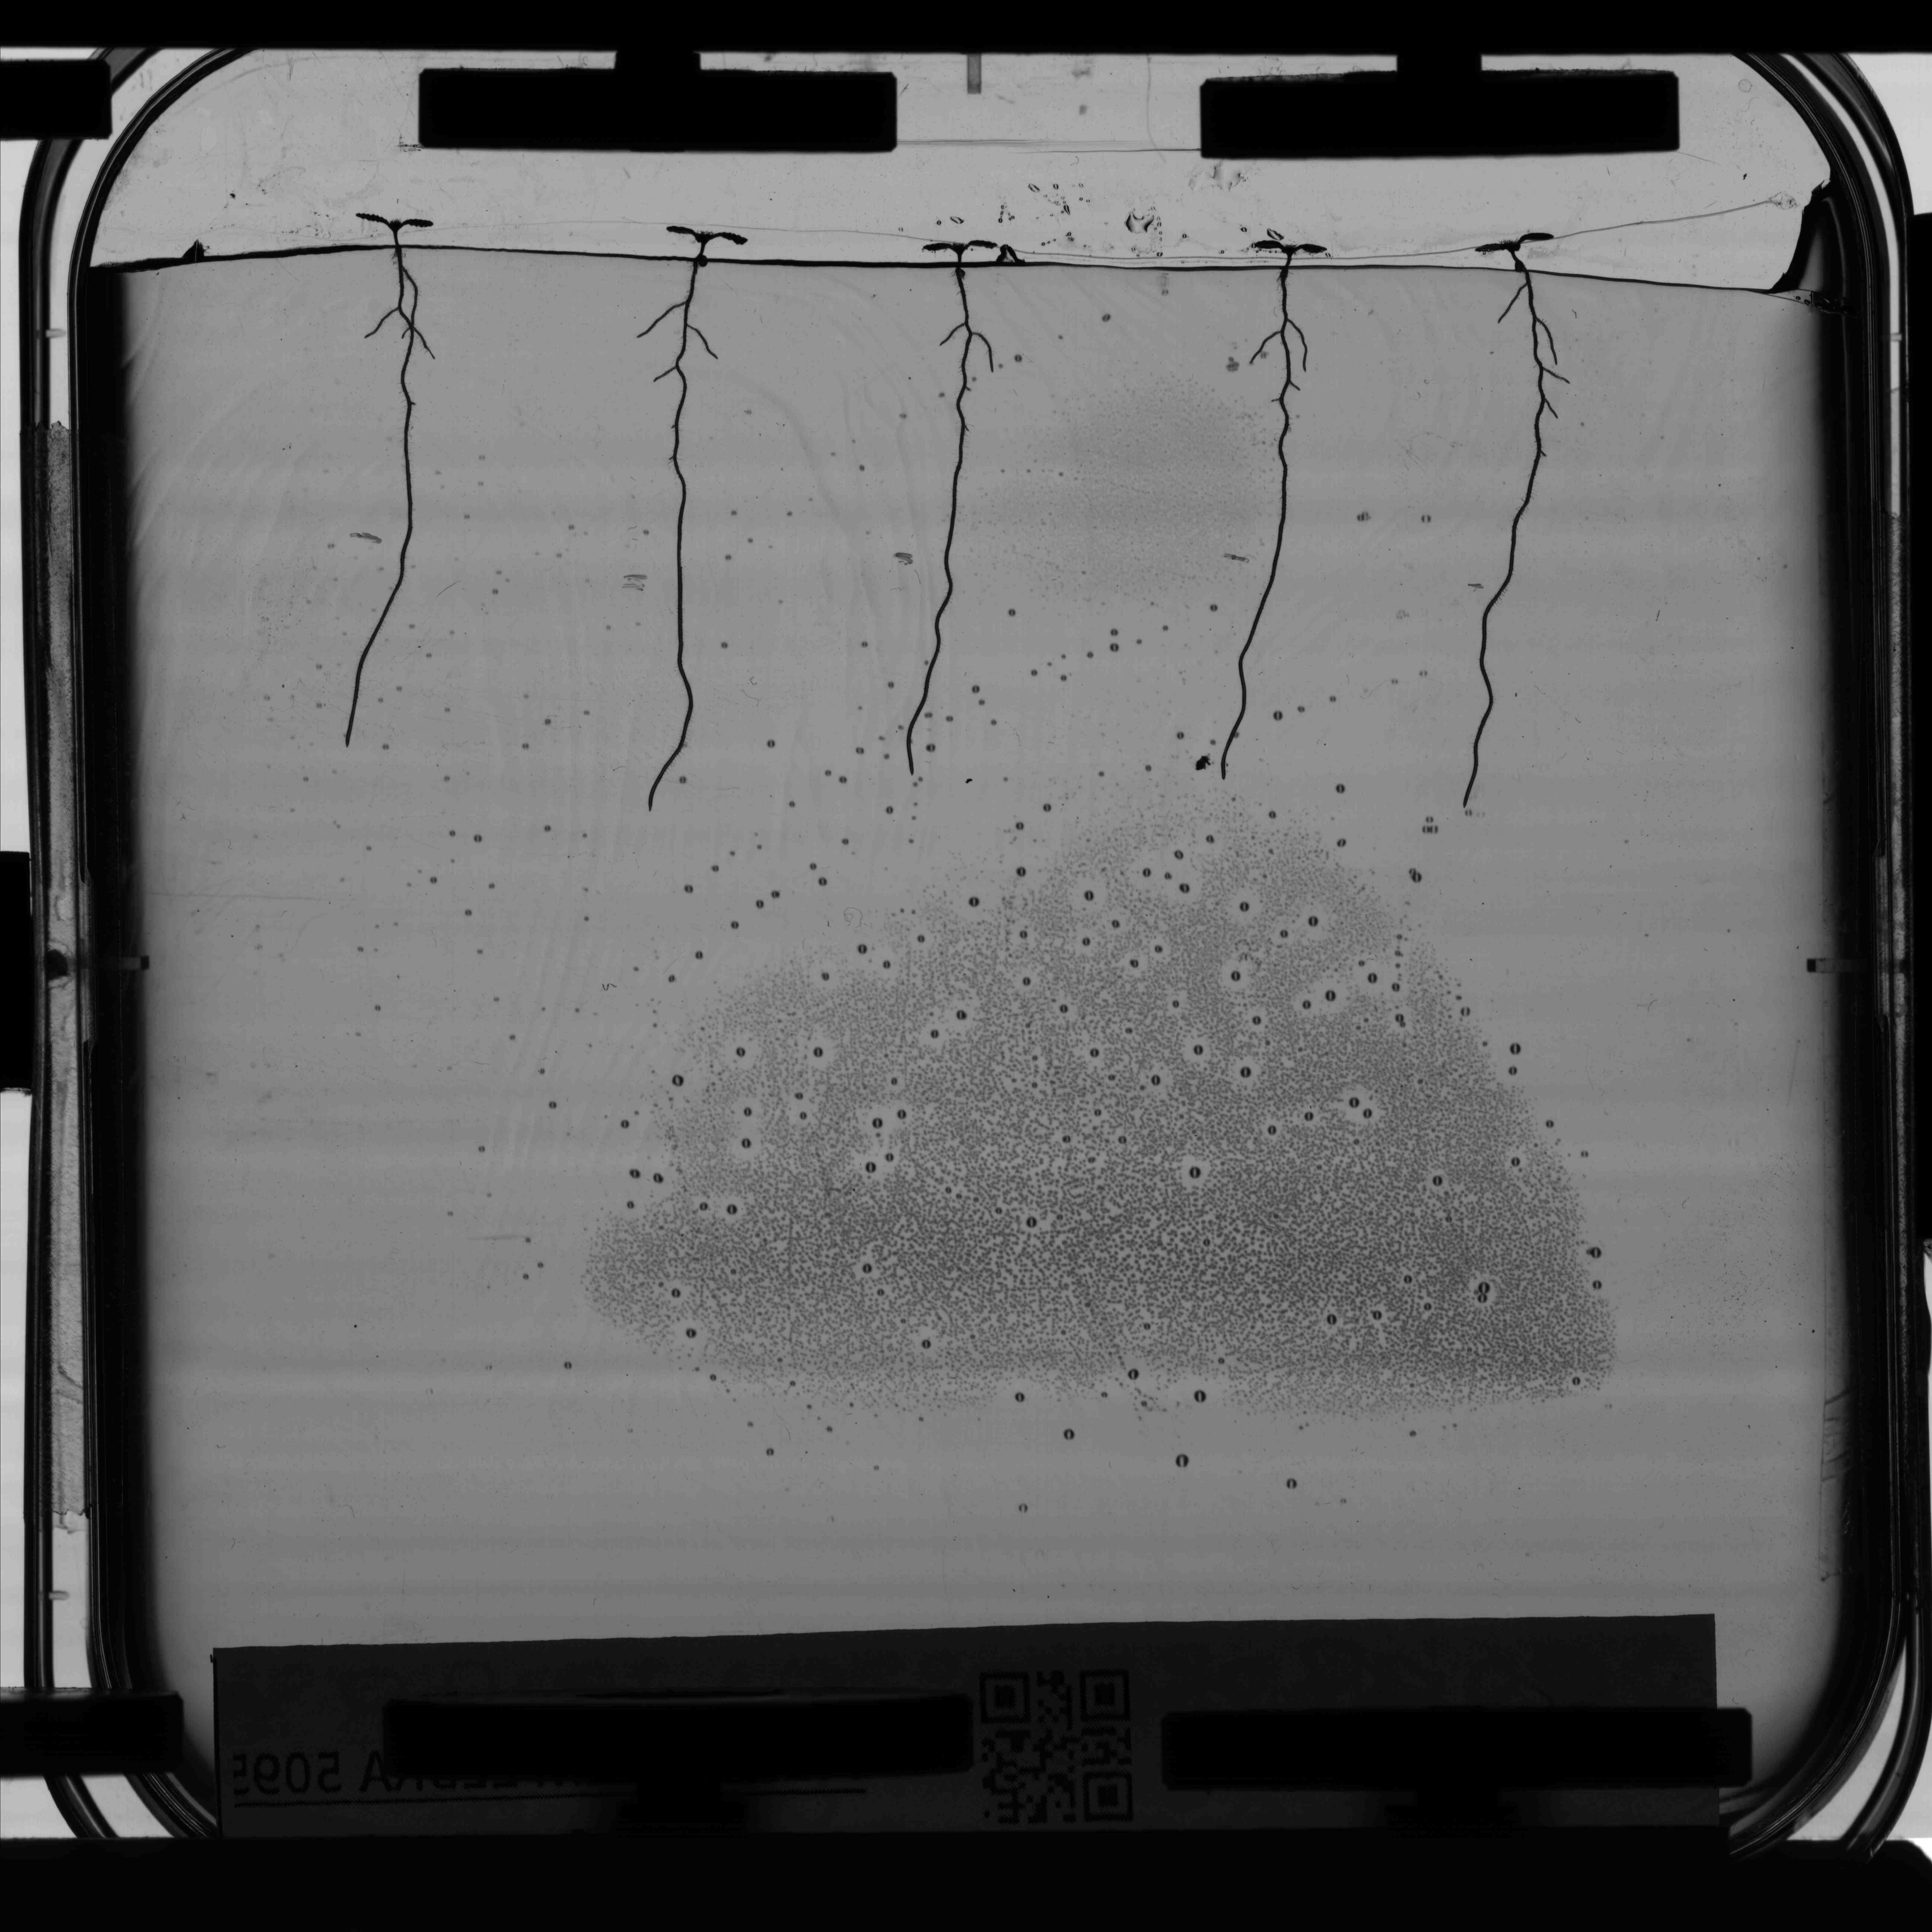

In [4]:
image_filename = get_data_path('pipeline/image_new2.jpg')
Image(image_filename)

### Load Image

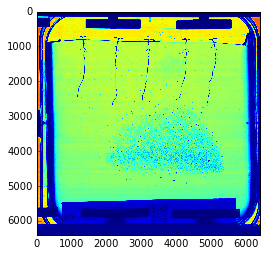

In [5]:
image = load_image(image_filename)
imshow(image)

### Detect features (Petri plate)

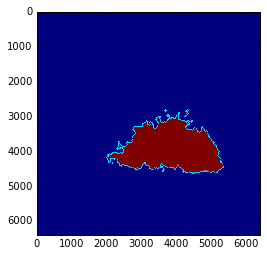

In [11]:
pmask, px_scale, hull = detect_petri_plate(image,border_width=25, plate_size=100, fg_smooth=1)
imshow(pmask)

### Image Segmentation

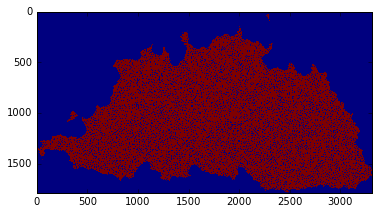

In [12]:
rmask, bbox = segment_image(image,pmask,root_max_radius=5)
imshow(rmask)

### Detect leaves and seed

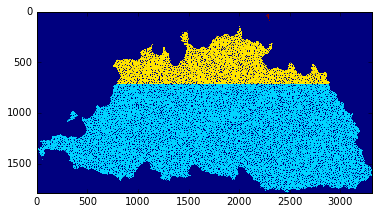

In [13]:
seed_map = detect_leaves(rmask, image, bbox, plant_number=5, leaf_bbox=[0,0,1,.4])
#imshow(seed_map)
imshow(seed_map+rmask)

### Compute the graph corresponding to the RSA

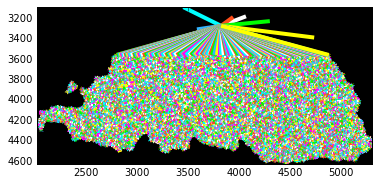

In [15]:
graph = compute_graph(rmask,seed_map,bbox)
graph.plot(linewidth=4)

### Extract a tree from the graph

In [21]:
tree = compute_tree(graph, px_scale=px_scale)
tree.plot(linewidth=10)

MemoryError: 

### Save the RSA into an MTG

In [22]:
g = rsa = tree_to_mtg(tree)
g.display()

NameError: name 'tree' is not defined